In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import sunau
from scipy import signal
from scipy.io import wavfile
import pandas as pd


def loadAudioAndTranscript(basePath, timeStamp):
    audioPath = basePath + "audio" + timeStamp + ".wav"
    transcriptPath = basePath + "transcript" + timeStamp + ".txt"
    transcript_df = pd.read_csv(transcriptPath, names = ["key_code", "press_release", "time_stamp"])
    transcript_df["rel_time_stamp"] = transcript_df["time_stamp"] - int(timeStamp)
    sample_rate, samples = wavfile.read(audioPath)
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
    spectrogram = np.log(spectrogram)
    transposed_spec = spectrogram.transpose()
    freq_list = list(frequencies)
    #freq_list = [str(f) for f in freq_list]
    #freq_list = [f + " Hz" for f in freq_list]
    audio_df = pd.DataFrame(transposed_spec, index = times, columns = freq_list )
    audio_df.index = times
    audio_df
    return transcript_df, audio_df, samples, sample_rate

In [21]:
def constructSpectrogramFigure(audio_df, transcript_df):
    fig, ax = plt.subplots(figsize=(16, 4))
    im = plt.pcolormesh(audio_df.index, audio_df.columns, audio_df.transpose(), shading='auto')
    nkeys = len(transcript_df)
    dy = 8000 / nkeys
    y_pos = 8000 + dy
    for index, row in transcript_df.iterrows():
        plt.text((row["rel_time_stamp"] - 200) / 1000, y_pos - index * dy, row["key_code"])

In [27]:
#def getNumberOfKeyPresses():
#1647128490847
transcript_df, audio_df, samples, sample_rate = loadAudioAndTranscript("C:\\Users\\kbk17\\Espionage-Data\\", "1647128490847")
len(transcript_df)/2
samples.shape

(319524,)

In [38]:
d

159762.0

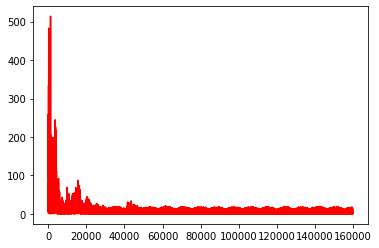

In [41]:
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile # get the api
b=[(ele/2**8.)*2-1 for ele in samples] # this is 8-bit track, b is now normalized on [-1,1)
c = fft(b) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)
plt.plot(abs(c[:int(d-1)]),'r') 
plt.show()

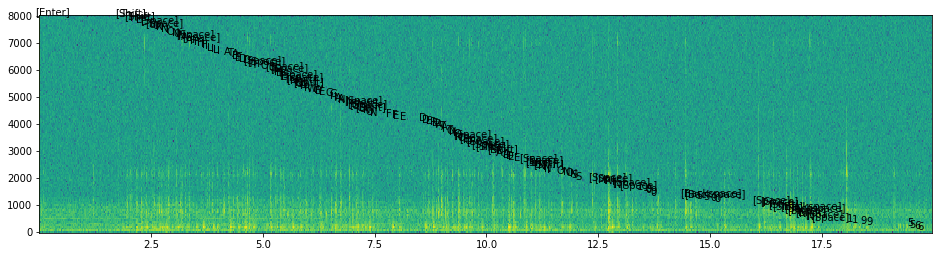

In [13]:
constructSpectrogramFigure(audio_df, transcript_df)

In [34]:
audio_fft = np.fft.fft(samples, axis=0)
audio_fft.shape

(319524,)

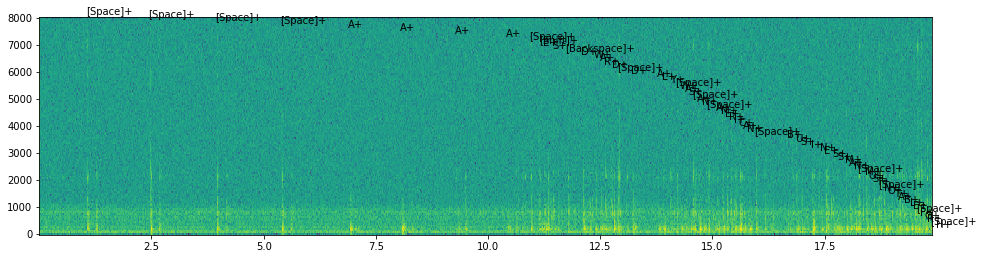

In [103]:
#transcript1646542999698
transcript_df, audio_df = loadAudioAndTranscript("C:\Users\kbk17\Espionage-Data\", "1646542999698")
constructSpectrogramFigure(audio_df, transcript_df)

In [ ]:
with sunau.open("training_data/audio_1646527421357.au") as f:
    audio_data = np.frombuffer(f.readframes(f.getnframes()), dtype=np.int16)
samples = audio_data
sample_rate = f.getframerate()
f.close()
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
spectrogram = np.log(spectrogram)
spectrogram

Text(0.939, 5000, 'O')

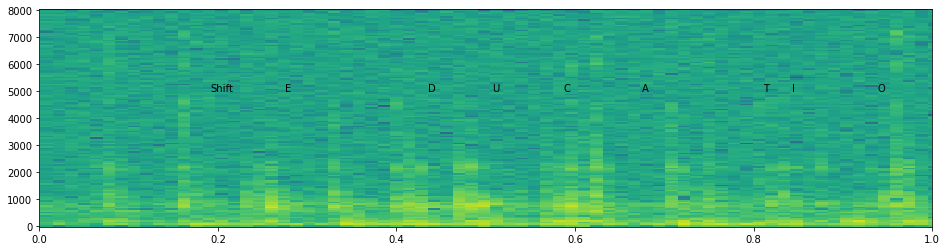

In [60]:
fig, ax = plt.subplots(figsize=(16, 4))
im = plt.pcolormesh(times, frequencies, spectrogram, shading='auto')
ax.set_xlim((0,1))
plt.text(.192, 5000, 'Shift')
plt.text(.275, 5000, 'E')
plt.text(.435, 5000, 'D')
plt.text(.507, 5000, 'U')
plt.text(.587, 5000, 'C')
plt.text(.675, 5000, 'A')
plt.text(.811, 5000, 'T')
plt.text(.843, 5000, 'I')
plt.text(.939, 5000, 'O')

In [9]:
samples.shape

(318500, 2)

In [36]:
transcript = pd.read_csv("Espionage/transcript1645497474925.txt", names = ["key_code", "time_stamp"])
transcript['rel_time_stamp'] = transcript['time_stamp'] - 1645497474925
transcript.head(40)

,key_code,time_stamp,rel_time_stamp
0,[Shift],1645497475117,192
1,E,1645497475200,275
2,D,1645497475360,435
3,U,1645497475432,507
4,C,1645497475512,587
5,A,1645497475600,675
6,T,1645497475736,811
7,I,1645497475768,843
8,O,1645497475864,939
9,N,1645497475928,1003


In [83]:
# new data
import numpy as np
import matplotlib.pyplot as plt

frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
spectrogram = np.log(spectrogram)

In [84]:
spectrogram

array([[ -3.658565 , -11.0373125,  -8.466016 , ...,  -8.071813 ,
         -9.078499 ,  -7.477647 ],
       [ -6.1124787,  -3.8122885,  -4.2339406, ...,  -5.5460544,
         -5.889543 ,  -6.8766394],
       [ -5.8537235,  -5.185315 ,  -6.4048567, ...,  -6.177134 ,
         -6.769705 ,  -5.285715 ],
       ...,
       [ -4.9014983, -11.012179 , -10.172829 , ..., -10.966097 ,
         -8.876269 , -10.582092 ],
       [ -4.8547115, -10.890235 , -11.368326 , ..., -10.962426 ,
        -10.9790745, -10.6469755],
       [ -5.606014 , -14.123256 , -10.451233 , ..., -10.458413 ,
        -13.515992 , -13.031176 ]], dtype=float32)

Text(0, 0.5, 'Frequency in Hz')

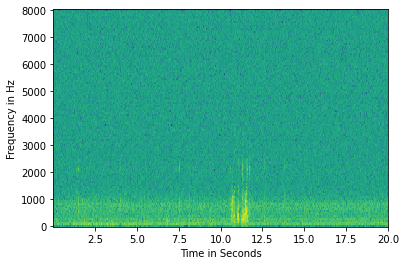

In [85]:
plt.pcolormesh(times, frequencies, spectrogram, shading='auto')
plt.xlabel("Time in Seconds")
plt.ylabel("Frequency in Hz")

Text(4.805, 3000, 'H')

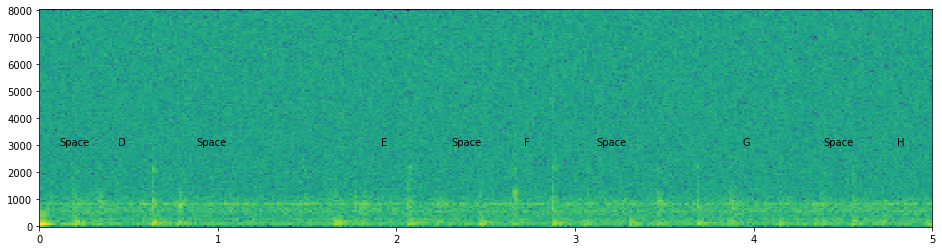

In [5]:
fig, ax = plt.subplots(figsize=(16, 4))
im = plt.pcolormesh(times, frequencies, spectrogram, shading='auto')
ax.set_xlim((0,5))
plt.text(.111, 3000, 'Space')
plt.text(.438, 3000, 'D')
plt.text(.877, 3000, 'Space')
plt.text(1.912, 3000, 'E')
plt.text(2.310, 3000, 'Space')
plt.text(2.717, 3000, 'F')
plt.text(3.117, 3000, 'Space')
plt.text(3.936, 3000, 'G')
plt.text(4.393, 3000, 'Space')
plt.text(4.805, 3000, 'H')

In [15]:
transcript = pd.read_csv("transcript1645585387453.txt", names = ["key_code", "time_stamp"])
transcript['rel_time_stamp'] = transcript['time_stamp'] - 1645585387453
transcript.head(20)

,key_code,time_stamp,rel_time_stamp
0,[Space],1645585387564,111
1,D,1645585387891,438
2,[Space],1645585388330,877
3,E,1645585389365,1912
4,[Space],1645585389763,2310
5,F,1645585390170,2717
6,[Space],1645585390570,3117
7,G,1645585391010,3557
8,[Space],1645585391389,3936
9,H,1645585391846,4393


In [7]:
#new data
#files: transcript1645735084825.txt, audio_1645735084825.wav
sample_rate, samples = wavfile.read("audio_1645735084825.wav")
frequencies, times, spectrogram = signal.spectrogram(samples[:,1], sample_rate)
spectrogram = np.log(spectrogram)

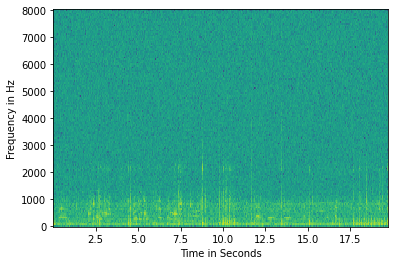

In [10]:
plt.pcolormesh(times, frequencies, spectrogram, shading='auto')
plt.xlabel("Time in Seconds")
plt.ylabel("Frequency in Hz")
plt.xlim = (0,1)

Text(18.533, 3000, 'a')

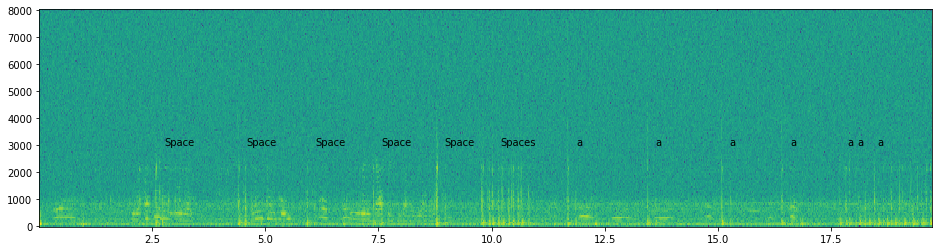

In [21]:
fig, ax = plt.subplots(figsize=(16, 4))
im = plt.pcolormesh(times, frequencies, spectrogram, shading='auto')
plt.text(2.774, 3000, 'Space')
plt.text(4.589, 3000, 'Space')
plt.text(6.101, 3000, 'Space')
plt.text(7.565, 3000, 'Space')
plt.text(8.965, 3000, 'Space')
plt.text(10.197, 3000, 'Spaces')
plt.text(11.869, 3000, 'a')
plt.text(13.629, 3000, 'a')
plt.text(15.269, 3000, 'a')
plt.text(16.601, 3000, 'a')
plt.text(17.877, 3000, 'a')
plt.text(18.093, 3000, 'a')
plt.text(18.533, 3000, 'a')

In [2]:
import matplotlib as plt
fig, ax = plt.subplots(figsize=(16, 4))
im = plt.pcolormesh(times, frequencies, spectrogram, shading='auto')
ax.set_xlim((5,20))

AttributeError: module 'matplotlib' has no attribute 'subplots'

In [17]:
import pandas as pd
transcript = pd.read_csv("transcript1645735084825.txt", names = ["key_code", "time_stamp"])
transcript['rel_time_stamp'] = transcript['time_stamp'] - 1645735084825
transcript.head(20)

,key_code,time_stamp,rel_time_stamp
0,[Space],1645735087599,2774
1,[Space],1645735089414,4589
2,[Space],1645735090926,6101
3,[Space],1645735092390,7565
4,[Space],1645735093790,8965
5,[Space],1645735094806,9981
6,[Space],1645735095022,10197
7,[Space],1645735095254,10429
8,[Space],1645735095478,10653
9,[Space],1645735095670,10845


In [11]:
#new data
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
sample_rate, samples = wavfile.read("training_data/audio_1645919011627.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
spectrogram = np.log(spectrogram)
spectrogram

array([[ -8.789257 , -10.806277 , -10.928799 , ...,  -8.670321 ,
         -9.481685 ,  -5.8056884],
       [ -4.745367 ,  -6.301349 ,  -5.272972 , ...,  -3.03596  ,
         -2.2710361,  -1.8132104],
       [ -6.6006646,  -6.099815 ,  -6.410013 , ...,  -6.879382 ,
         -3.3076835,  -1.8296795],
       ...,
       [ -9.91229  ,  -9.507042 , -10.080396 , ...,  -9.781774 ,
        -10.388259 , -11.697747 ],
       [-11.106312 , -10.682448 , -12.999699 , ..., -10.952445 ,
        -10.671385 ,  -8.984261 ],
       [-13.201286 , -11.465317 ,  -9.3553095, ..., -13.155295 ,
        -10.91252  , -11.2472315]], dtype=float32)

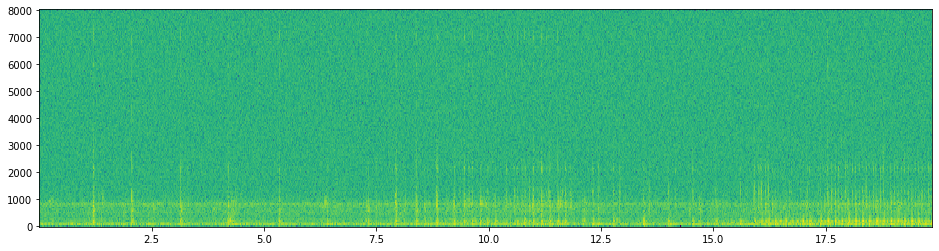

In [28]:
fig, ax = plt.subplots(figsize=(16, 4))
im = plt.pcolormesh(times, frequencies, spectrogram, shading='auto')

In [9]:
import pandas as pd
transcript = pd.read_csv("training_data/transcript1645919011627.txt", names = ["key_code", "time_stamp"])
transcript['rel_time_stamp'] = transcript['time_stamp'] - 1645919011627
transcript.head(60)

,key_code,time_stamp,rel_time_stamp
0,[Space],1645919012948,1321
1,[Space],1645919013776,2149
2,[Space],1645919014856,3229
3,[Space],1645919015920,4293
4,[Space],1645919017056,5429
5,[Space],1645919018128,6501
6,[Space],1645919019032,7405
7,[Space],1645919019664,8037
8,[Space],1645919020120,8493
9,[Space],1645919020568,8941


In [69]:
def map_space(s):
    if s == '[Space]':
        return "$\u02FD$"
    else:
        return s
transcript["unicode_key_code"] = transcript["key_code"].map(map_space)
transcript

,key_code,time_stamp,rel_time_stamp,unicode_key_code
0,[Space],1645927117852,1462,$˽$
1,[Space],1645927120209,3819,$˽$
2,[Space],1645927122649,6259,$˽$
3,[Space],1645927125009,8619,$˽$
4,[Space],1645927125489,9099,$˽$
5,A,1645927127906,11516,A
6,A,1645927130266,13876,A
7,A,1645927133089,16699,A
8,S,1645927135841,19451,S


Font 'rm' does not have a glyph for '\u02fd' [U+2fd], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u02fd' [U+2fd], substituting with a dummy symbol.


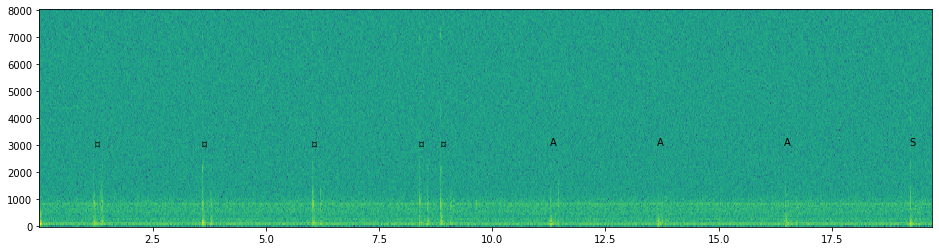

In [70]:
fig, ax = plt.subplots(figsize=(16, 4))
im = plt.pcolormesh(times, frequencies, spectrogram, shading='auto')
for index, row in transcript.iterrows():
    plt.text((row['rel_time_stamp']-250) / 1000, 3000, row['unicode_key_code'], font='')

In [36]:
#new data
sample_rate, samples = wavfile.read("training_data/audio_1645927116390.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
spectrogram = np.log(spectrogram)
spectrogram

array([[ -3.8193936 ,  -4.7983785 ,  -5.921851  , ...,  -8.477571  ,
         -9.276241  , -12.582316  ],
       [ -2.4681277 ,   1.8863522 ,   0.62578976, ...,  -6.6507444 ,
         -6.286613  ,  -5.035055  ],
       [ -2.8399973 ,  -0.14207503,  -1.1370144 , ...,  -6.295248  ,
         -5.8303    ,  -6.563014  ],
       ...,
       [-12.987317  , -10.116381  ,  -9.369681  , ..., -11.087273  ,
        -11.382071  ,  -9.965671  ],
       [-10.721543  , -10.005907  , -10.503171  , ..., -10.662187  ,
        -10.103621  , -10.592083  ],
       [-16.37745   , -13.439273  , -10.851498  , ..., -10.516209  ,
        -14.9249525 , -14.548042  ]], dtype=float32)

In [38]:
transcript = pd.read_csv("training_data/transcript1645927116390.txt", names = ["key_code", "time_stamp"])
transcript['rel_time_stamp'] = transcript['time_stamp'] - 1645927116390
transcript.head(9)

,key_code,time_stamp,rel_time_stamp
0,[Space],1645927117852,1462
1,[Space],1645927120209,3819
2,[Space],1645927122649,6259
3,[Space],1645927125009,8619
4,[Space],1645927125489,9099
5,A,1645927127906,11516
6,A,1645927130266,13876
7,A,1645927133089,16699
8,S,1645927135841,19451


(0.0, 7.0)

Font 'rm' does not have a glyph for '\u02fd' [U+2fd], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u02fd' [U+2fd], substituting with a dummy symbol.


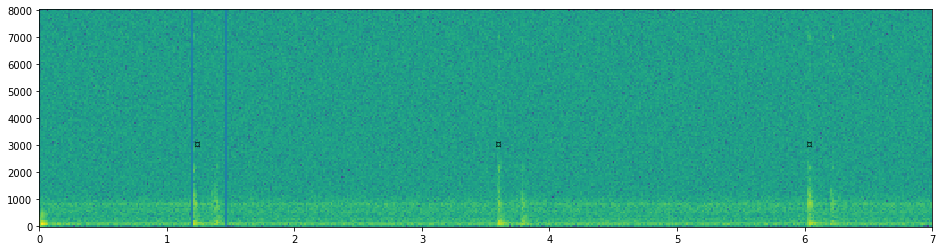

In [72]:
fig, ax = plt.subplots(figsize=(16, 4))

im = plt.pcolormesh(times, frequencies, spectrogram, shading='auto')
for index, row in transcript.iterrows():
    if row['rel_time_stamp'] < 7000:
        plt.text((row['rel_time_stamp'] - 250)/ 1000, 3000, row['unicode_key_code'])
plt.axvline(1.462)
plt.axvline(1.2)
ax.set_xlim((0,7))

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import sunau

#new data transcript1646524722840
with sunau.open("training_data/audio_1646524722840.wav") as f:
    audio_data = np.frombuffer(f.readframes(4294967295), dtype=np.int16)
samples = audio_data
sample_rate = f.getframerate()

In [15]:
#sample_rate, samples = wavfile.read("training_data/audio_1646524722840.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
spectrogram = np.log(spectrogram)
spectrogram

array([[ 3.0962574 ,  6.653665  ,  4.2279887 , ...,  7.7517514 ,
        -0.05791183,  5.4934173 ],
       [ 7.185582  ,  5.1057825 ,  5.776247  , ..., 10.376051  ,
         9.879116  ,  9.481455  ],
       [ 5.291409  ,  6.1342697 ,  6.604133  , ...,  7.408635  ,
         6.9933333 ,  6.907726  ],
       ...,
       [ 0.8122338 ,  1.0743936 ,  0.509986  , ..., -1.9201063 ,
        -0.04924238,  0.856761  ],
       [-0.4276094 ,  1.3782852 , -0.8016248 , ...,  2.2713673 ,
        -0.89602256, -1.0302572 ],
       [-1.7859384 ,  1.0596604 , -2.1620042 , ..., -1.5940765 ,
        -0.7804168 ,  0.31768218]], dtype=float32)

Exception ignored in: <function Au_read.__del__ at 0x0000022DC00A90D0>
Traceback (most recent call last):
  File "c:\users\kbk17\appdata\local\programs\python\python39\lib\sunau.py", line 169, in __del__
    if self._file:
AttributeError: 'Au_read' object has no attribute '_file'


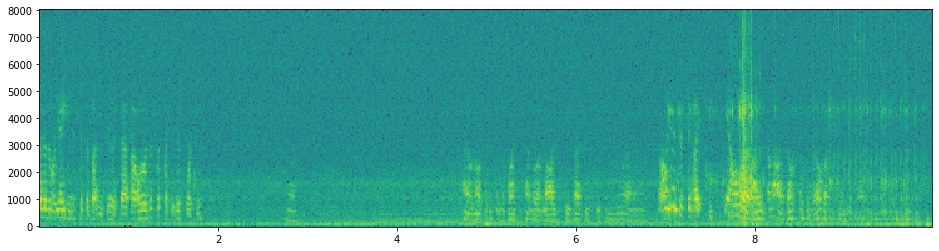

In [16]:
fig, ax = plt.subplots(figsize=(16, 4))
im = plt.pcolormesh(times, frequencies, spectrogram, shading='auto')

In [ ]:
def loadAudioAndTranscript(basePath, timeStamp):
    with

In [19]:
#new data audio_1646527421357
#np.frombuffer() check dtype
with sunau.open("training_data/audio_1646527421357.au") as f:
    audio_data = np.frombuffer(f.readframes(f.getnframes()), dtype=np.int16)
samples = audio_data
sample_rate = f.getframerate()
f.close()
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
spectrogram = np.log(spectrogram)
spectrogram

array([[ 2.7800865 , -0.84009874,  3.7710488 , ...,  3.502734  ,
        -2.1354768 ,  2.887387  ],
       [ 7.6786437 ,  7.2656    ,  6.82159   , ...,  6.391755  ,
         7.2271347 ,  6.8033085 ],
       [ 5.747942  ,  5.608245  ,  2.1614816 , ...,  6.17721   ,
         1.9902472 ,  2.6931407 ],
       ...,
       [ 1.698485  , -0.62109864,  0.8282816 , ..., -0.6184502 ,
        -1.0872223 , -0.07889283],
       [ 0.71462154,  1.5311583 ,  0.38021958, ...,  2.18729   ,
         0.4406908 ,  0.18731955],
       [-0.37004834,  1.3198395 , -2.0150898 , ..., -0.7808861 ,
        -0.93511164, -0.9807694 ]], dtype=float32)

Exception ignored in: <function Au_read.__del__ at 0x0000022DC00A90D0>
Traceback (most recent call last):
  File "c:\users\kbk17\appdata\local\programs\python\python39\lib\sunau.py", line 169, in __del__
    if self._file:
AttributeError: 'Au_read' object has no attribute '_file'


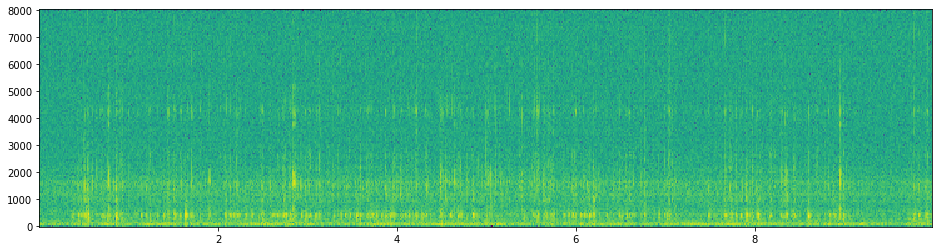

In [20]:
fig, ax = plt.subplots(figsize=(16, 4))
im = plt.pcolormesh(times, frequencies, spectrogram, shading='auto')

In [22]:
import pandas as pd

In [39]:

transposed_spec = spectrogram.transpose()
freq_list = [f + " Hz" for f in freq_list]
audio_df = pd.DataFrame(transposed_spec, index = times, columns = freq_list )
audio_df.index = times
audio_df

,0.0 Hz Hz,62.5 Hz Hz,125.0 Hz Hz,187.5 Hz Hz,250.0 Hz Hz,312.5 Hz Hz,375.0 Hz Hz,437.5 Hz Hz,500.0 Hz Hz,562.5 Hz Hz,...,7437.5 Hz Hz,7500.0 Hz Hz,7562.5 Hz Hz,7625.0 Hz Hz,7687.5 Hz Hz,7750.0 Hz Hz,7812.5 Hz Hz,7875.0 Hz Hz,7937.5 Hz Hz,8000.0 Hz Hz
0.008,2.780087,7.678644,5.747942,2.452713,4.981398,2.402527,0.850699,4.823561,2.303636,4.343545,...,-0.112188,-1.893825,-0.161476,-0.417777,1.355214,-0.177109,1.217160,1.698485,0.714622,-0.370048
0.022,-0.840099,7.265600,5.608245,0.496874,3.275536,2.659938,-1.005736,1.880144,3.067809,2.142518,...,1.275651,0.280187,1.924912,0.356981,0.925721,1.652135,0.148417,-0.621099,1.531158,1.319839
0.036,3.771049,6.821590,2.161482,4.562533,3.357105,3.433145,3.457498,3.766235,2.394262,2.502729,...,0.347785,-1.876131,0.052518,1.190054,-0.251509,-0.874559,-2.428164,0.828282,0.380220,-2.015090
0.050,2.265752,6.937991,6.293900,4.144418,4.489629,3.043188,4.217476,0.186450,3.361697,-0.930426,...,0.882753,-1.533968,0.241412,1.820635,1.766038,0.954089,-2.780627,0.517239,0.106137,-0.942405
0.064,1.369845,4.529404,5.945094,4.217662,3.743769,1.309395,1.897594,3.203375,2.200364,1.692446,...,0.621684,0.932784,-4.190964,0.776704,1.365168,-0.277750,2.106718,0.947499,-2.265786,-3.896553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.920,1.668245,5.098812,4.669389,4.990135,4.927894,7.384388,7.597396,7.825785,6.820319,4.064231,...,0.443318,0.613703,0.829127,1.084548,1.263300,1.913513,1.746461,1.822840,3.138522,0.359126
9.934,2.810951,8.604642,6.738020,7.146804,6.781766,7.922192,5.727583,8.412522,6.614787,4.776568,...,0.185279,2.511559,-0.370891,0.572470,2.632391,-1.575185,1.024297,0.768627,2.765317,0.615405
9.948,3.502734,6.391755,6.177210,6.123136,4.548692,5.558824,3.868851,5.818461,3.973956,4.715825,...,2.058605,0.182928,1.076719,-2.638229,0.987651,-0.965775,0.457537,-0.618450,2.187290,-0.780886
9.962,-2.135477,7.227135,1.990247,4.979049,2.597077,5.509256,4.353795,6.001424,2.036172,1.449277,...,1.003512,1.254403,0.573068,0.210950,1.217776,1.142368,0.683182,-1.087222,0.440691,-0.935112


In [24]:
times

array([8.000e-03, 2.200e-02, 3.600e-02, 5.000e-02, 6.400e-02, 7.800e-02,
       9.200e-02, 1.060e-01, 1.200e-01, 1.340e-01, 1.480e-01, 1.620e-01,
       1.760e-01, 1.900e-01, 2.040e-01, 2.180e-01, 2.320e-01, 2.460e-01,
       2.600e-01, 2.740e-01, 2.880e-01, 3.020e-01, 3.160e-01, 3.300e-01,
       3.440e-01, 3.580e-01, 3.720e-01, 3.860e-01, 4.000e-01, 4.140e-01,
       4.280e-01, 4.420e-01, 4.560e-01, 4.700e-01, 4.840e-01, 4.980e-01,
       5.120e-01, 5.260e-01, 5.400e-01, 5.540e-01, 5.680e-01, 5.820e-01,
       5.960e-01, 6.100e-01, 6.240e-01, 6.380e-01, 6.520e-01, 6.660e-01,
       6.800e-01, 6.940e-01, 7.080e-01, 7.220e-01, 7.360e-01, 7.500e-01,
       7.640e-01, 7.780e-01, 7.920e-01, 8.060e-01, 8.200e-01, 8.340e-01,
       8.480e-01, 8.620e-01, 8.760e-01, 8.900e-01, 9.040e-01, 9.180e-01,
       9.320e-01, 9.460e-01, 9.600e-01, 9.740e-01, 9.880e-01, 1.002e+00,
       1.016e+00, 1.030e+00, 1.044e+00, 1.058e+00, 1.072e+00, 1.086e+00,
       1.100e+00, 1.114e+00, 1.128e+00, 1.142e+00, 

In [25]:
2.200e-02 - 8.000e-03

0.013999999999999999

In [27]:
20/713

0.028050490883590462

In [29]:
frequencies

array([   0. ,   62.5,  125. ,  187.5,  250. ,  312.5,  375. ,  437.5,
        500. ,  562.5,  625. ,  687.5,  750. ,  812.5,  875. ,  937.5,
       1000. , 1062.5, 1125. , 1187.5, 1250. , 1312.5, 1375. , 1437.5,
       1500. , 1562.5, 1625. , 1687.5, 1750. , 1812.5, 1875. , 1937.5,
       2000. , 2062.5, 2125. , 2187.5, 2250. , 2312.5, 2375. , 2437.5,
       2500. , 2562.5, 2625. , 2687.5, 2750. , 2812.5, 2875. , 2937.5,
       3000. , 3062.5, 3125. , 3187.5, 3250. , 3312.5, 3375. , 3437.5,
       3500. , 3562.5, 3625. , 3687.5, 3750. , 3812.5, 3875. , 3937.5,
       4000. , 4062.5, 4125. , 4187.5, 4250. , 4312.5, 4375. , 4437.5,
       4500. , 4562.5, 4625. , 4687.5, 4750. , 4812.5, 4875. , 4937.5,
       5000. , 5062.5, 5125. , 5187.5, 5250. , 5312.5, 5375. , 5437.5,
       5500. , 5562.5, 5625. , 5687.5, 5750. , 5812.5, 5875. , 5937.5,
       6000. , 6062.5, 6125. , 6187.5, 6250. , 6312.5, 6375. , 6437.5,
       6500. , 6562.5, 6625. , 6687.5, 6750. , 6812.5, 6875. , 6937.5,
      

In [36]:
freq_list = list(frequencies)
freq_list = [(str(f) + " Hz") for f in freq_list]
freq_list

['0.0 Hz',
 '62.5 Hz',
 '125.0 Hz',
 '187.5 Hz',
 '250.0 Hz',
 '312.5 Hz',
 '375.0 Hz',
 '437.5 Hz',
 '500.0 Hz',
 '562.5 Hz',
 '625.0 Hz',
 '687.5 Hz',
 '750.0 Hz',
 '812.5 Hz',
 '875.0 Hz',
 '937.5 Hz',
 '1000.0 Hz',
 '1062.5 Hz',
 '1125.0 Hz',
 '1187.5 Hz',
 '1250.0 Hz',
 '1312.5 Hz',
 '1375.0 Hz',
 '1437.5 Hz',
 '1500.0 Hz',
 '1562.5 Hz',
 '1625.0 Hz',
 '1687.5 Hz',
 '1750.0 Hz',
 '1812.5 Hz',
 '1875.0 Hz',
 '1937.5 Hz',
 '2000.0 Hz',
 '2062.5 Hz',
 '2125.0 Hz',
 '2187.5 Hz',
 '2250.0 Hz',
 '2312.5 Hz',
 '2375.0 Hz',
 '2437.5 Hz',
 '2500.0 Hz',
 '2562.5 Hz',
 '2625.0 Hz',
 '2687.5 Hz',
 '2750.0 Hz',
 '2812.5 Hz',
 '2875.0 Hz',
 '2937.5 Hz',
 '3000.0 Hz',
 '3062.5 Hz',
 '3125.0 Hz',
 '3187.5 Hz',
 '3250.0 Hz',
 '3312.5 Hz',
 '3375.0 Hz',
 '3437.5 Hz',
 '3500.0 Hz',
 '3562.5 Hz',
 '3625.0 Hz',
 '3687.5 Hz',
 '3750.0 Hz',
 '3812.5 Hz',
 '3875.0 Hz',
 '3937.5 Hz',
 '4000.0 Hz',
 '4062.5 Hz',
 '4125.0 Hz',
 '4187.5 Hz',
 '4250.0 Hz',
 '4312.5 Hz',
 '4375.0 Hz',
 '4437.5 Hz',
 '4500.0 Hz

In [37]:
audio_df.columns = freq_list

In [38]:
audio_df

,0.0 Hz,62.5 Hz,125.0 Hz,187.5 Hz,250.0 Hz,312.5 Hz,375.0 Hz,437.5 Hz,500.0 Hz,562.5 Hz,...,7437.5 Hz,7500.0 Hz,7562.5 Hz,7625.0 Hz,7687.5 Hz,7750.0 Hz,7812.5 Hz,7875.0 Hz,7937.5 Hz,8000.0 Hz
0.008,2.780087,7.678644,5.747942,2.452713,4.981398,2.402527,0.850699,4.823561,2.303636,4.343545,...,-0.112188,-1.893825,-0.161476,-0.417777,1.355214,-0.177109,1.217160,1.698485,0.714622,-0.370048
0.022,-0.840099,7.265600,5.608245,0.496874,3.275536,2.659938,-1.005736,1.880144,3.067809,2.142518,...,1.275651,0.280187,1.924912,0.356981,0.925721,1.652135,0.148417,-0.621099,1.531158,1.319839
0.036,3.771049,6.821590,2.161482,4.562533,3.357105,3.433145,3.457498,3.766235,2.394262,2.502729,...,0.347785,-1.876131,0.052518,1.190054,-0.251509,-0.874559,-2.428164,0.828282,0.380220,-2.015090
0.050,2.265752,6.937991,6.293900,4.144418,4.489629,3.043188,4.217476,0.186450,3.361697,-0.930426,...,0.882753,-1.533968,0.241412,1.820635,1.766038,0.954089,-2.780627,0.517239,0.106137,-0.942405
0.064,1.369845,4.529404,5.945094,4.217662,3.743769,1.309395,1.897594,3.203375,2.200364,1.692446,...,0.621684,0.932784,-4.190964,0.776704,1.365168,-0.277750,2.106718,0.947499,-2.265786,-3.896553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.920,1.668245,5.098812,4.669389,4.990135,4.927894,7.384388,7.597396,7.825785,6.820319,4.064231,...,0.443318,0.613703,0.829127,1.084548,1.263300,1.913513,1.746461,1.822840,3.138522,0.359126
9.934,2.810951,8.604642,6.738020,7.146804,6.781766,7.922192,5.727583,8.412522,6.614787,4.776568,...,0.185279,2.511559,-0.370891,0.572470,2.632391,-1.575185,1.024297,0.768627,2.765317,0.615405
9.948,3.502734,6.391755,6.177210,6.123136,4.548692,5.558824,3.868851,5.818461,3.973956,4.715825,...,2.058605,0.182928,1.076719,-2.638229,0.987651,-0.965775,0.457537,-0.618450,2.187290,-0.780886
9.962,-2.135477,7.227135,1.990247,4.979049,2.597077,5.509256,4.353795,6.001424,2.036172,1.449277,...,1.003512,1.254403,0.573068,0.210950,1.217776,1.142368,0.683182,-1.087222,0.440691,-0.935112
